In [27]:
import json
import numpy as np
import pandas as pd

For each, calculate
- Average USE score for each sentence length
- Average ROUGEL for each sentence length
- Average USE*(1-ROUGEL)

In [77]:
def analyse_data(data):
       res = {}
       for input, paraphrases in data.items():
              l = len(input.split())
              if l not in res:
                     res[l] = {
                            "USE":[],
                            "ROUGEL":[],
                            "SCORE": [],
                     }
              for paraphrase, use, rouge in paraphrases:
                     res[l]["USE"].append(use)
                     res[l]["ROUGEL"].append(rouge)
                     # res[l]["SCORE"].append(1 + 2*use - rouge)
                     # res[l]["SCORE"].append(use/(rouge+0.1))
                     res[l]["SCORE"].append(use*(1-rouge))
       for l in res:
              res[l]["USE"] = np.mean(res[l]["USE"])
              res[l]["ROUGEL"] = np.mean(res[l]["ROUGEL"])
              res[l]["SCORE"] = np.mean(res[l]["SCORE"])
       return res

In [78]:
all_data = pd.DataFrame(columns=["model", "sentence_length", "use", "rougel", "score"])
models = ["gpt2", "gpt2-medium", "gpt2-large", "bart", "pegasus"]
for model in models:
       with open(f"results/{model}-paraphraser.json", "r") as f:
              data = json.load(f)
       res = analyse_data(data)
       
       for key in res:
              row = []
              row.append(model)
              row.append(key)
              row.append(res[key]["USE"])
              row.append(res[key]["ROUGEL"])
              row.append(res[key]["SCORE"])
              all_data.loc[len(all_data.index)] = row

all_data


,model,sentence_length,use,rougel,score
0,gpt2,7,0.898025,0.836907,0.119698
1,gpt2,8,0.931275,0.808623,0.168033
2,gpt2,9,0.937875,0.885199,0.098825
3,gpt2,10,0.968762,0.886246,0.105560
4,gpt2,11,0.914749,0.780696,0.176420
...,...,...,...,...,...
65,pegasus,16,0.843688,0.644768,0.295452
66,pegasus,17,0.776018,0.542918,0.342588
67,pegasus,18,0.794530,0.618724,0.274088
68,pegasus,19,0.803930,0.696274,0.238332


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1.5)

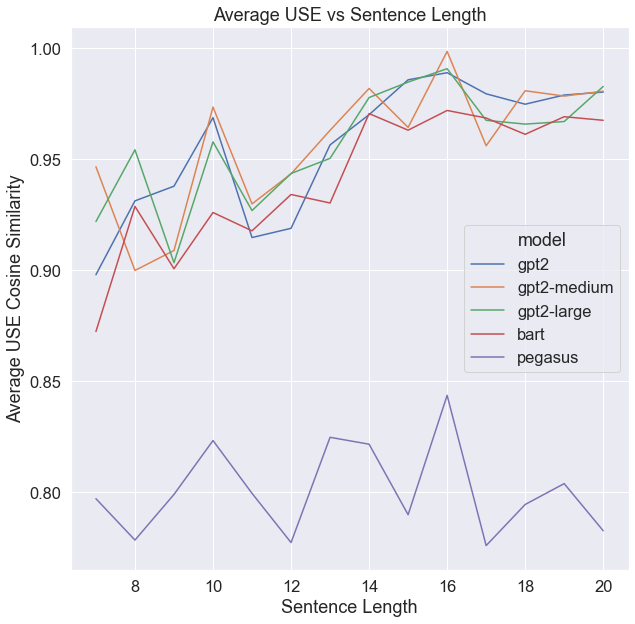

In [91]:
ax = sns.lineplot(data=all_data, x="sentence_length", y="use", hue="model")
ax.set(xlabel='Sentence Length', ylabel='Average USE Cosine Similarity', title="Average USE vs Sentence Length")
plt.show()

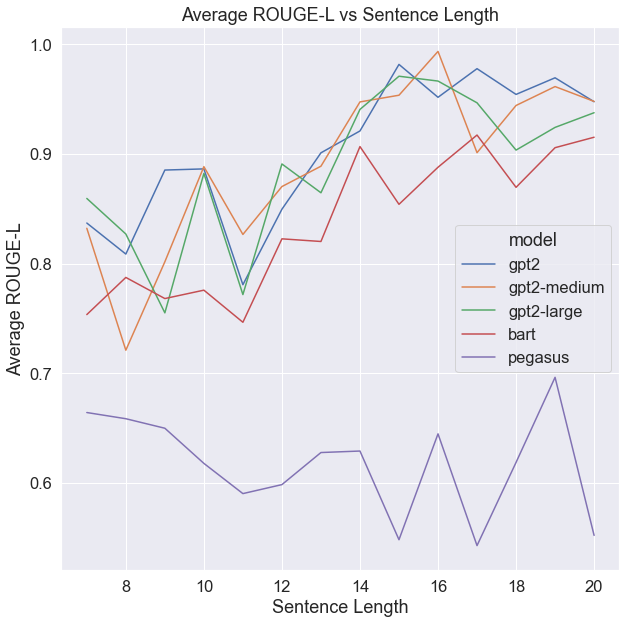

In [92]:
ax = sns.lineplot(data=all_data, x="sentence_length", y="rougel", hue="model")
ax.set(xlabel='Sentence Length', ylabel='Average ROUGE-L', title="Average ROUGE-L vs Sentence Length")
plt.show()

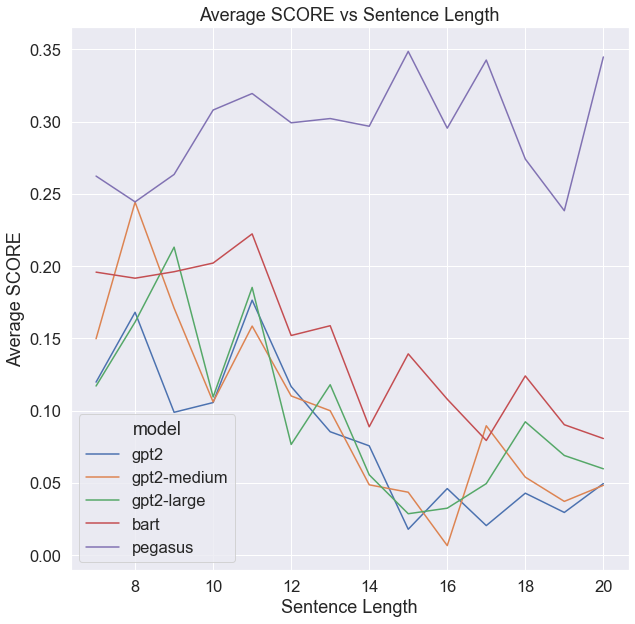

In [93]:
ax = sns.lineplot(data=all_data, x="sentence_length", y="score", hue="model")
ax.set(xlabel='Sentence Length', ylabel='Average SCORE', title="Average SCORE vs Sentence Length")
plt.show()

We can see that the USE scores are quite high for the small gpt models and not as high for the pegasus models. This likely due to the fact that the rougel scores for the gpt models are generally higher as well. the gpt models have rouge scores of either 1 or close to 1, so the sentence similarity would obvious be much higher because its just the same sentence. pegasus, on the other geneate diverse paraphrases, that retain the semantic meaning but aren't worded the same.

So, we will only analyse the data for rouge scores in a certain band.

<AxesSubplot:xlabel='sentence_length', ylabel='use'>

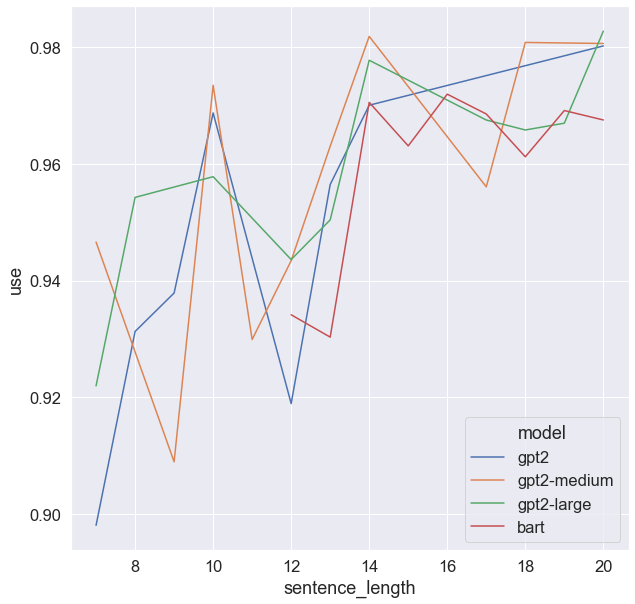

In [101]:
upper = 0.95
lower = 0.80
sns.lineplot(data=all_data[(all_data["rougel"]>lower) & (all_data["rougel"]<upper)], x="sentence_length", y="use", hue="model")
       

Compare specific sentences

In [121]:
models = ["gpt2", "gpt2-medium", "gpt2-large", "bart", "pegasus"]
sentences_to_analyse = [
       'MBA after B.TECH or JOB in IT.',
       "What's the difference between 打关系 and 走关系？",
       'The game was published on 2 October 2014 in North America and Europe and in Japan in June 2015 .',
       'She married Reinaldo Zamparelli in 1954 , living in Bogotá , Colombia and later in Lima , Peru .',
       'What kinds of words would you use to describe jewelry.',
       'Can supreme court of india make rules without parliament',
       'What is the most promising startup of 2010',
       'What Herbalife products have terrible side effects'
]

r = {}
for s in sentences_to_analyse:
       r[s]={}
       for model in models:
              with open(f"results/{model}-paraphraser.json", "r") as f:
                     data = json.load(f)
              paraphrases = data[s][:3]
              for i in range(len(paraphrases)):
                     paraphrases[i].append(paraphrases[i][1]*(1-paraphrases[i][2]))
              r[s][model] = paraphrases
              

r
       

       

{'MBA after B.TECH or JOB in IT.': {'gpt2': [['MBA after B.TECH or JOB in IT.',
    1.0000001192092896,
    1.0,
    0.0],
   ['MBA after B.TECH or JOB in IT.', 1.0000001192092896, 1.0, 0.0],
   ['MBA after B.TECH or JOB in IT.', 1.0000001192092896, 1.0, 0.0]],
  'gpt2-medium': [['MBA after B.Tech or JOB in IT.',
    1.0000001192092896,
    1.0,
    0.0],
   ['MBA after B.Tech or JOB in IT.', 1.0000001192092896, 1.0, 0.0],
   ['MBA after B.Tech or JOB in IT.', 1.0000001192092896, 1.0, 0.0]],
  'gpt2-large': [['MBA after B.TECH or JOB in IT?',
    1.0000001192092896,
    1.0,
    0.0],
   ['MBA after B.TECH or JOB in IT?', 1.0000001192092896, 1.0, 0.0],
   ['MBA after B.TECH or JOB in IT?', 1.0000001192092896, 1.0, 0.0]],
  'bart': [['What is the best field for earning money after completing a B.Tech in IT engineering?',
    0.6517427563667297,
    0.4166666666666667,
    0.380183274547259],
   ['What is the best field for earning money after completing a B.Tech in IT?',
    0.649669706

In [124]:
r['What kinds of words would you use to describe jewelry.']

{'gpt2': [['What kind of words would you use to describe jewelry?',
   0.9856175780296326,
   0.9,
   0.09856175780296324],
  ['What kind of words would you use to describe jewelry?',
   0.9856175780296326,
   0.9,
   0.09856175780296324],
  ['What kind of words would you use to describe jewelry?',
   0.9856175780296326,
   0.9,
   0.09856175780296324]],
 'gpt2-medium': [['What kind of words would you use to describe a piece of jewelry?',
   0.9459317922592163,
   0.7826086956521738,
   0.20563734614330798],
  ['What kind of words would you use to describe a piece of jewelry?',
   0.9459317922592163,
   0.7826086956521738,
   0.20563734614330798],
  ['What kind of words would you use to describe a piece of jewelry?',
   0.9459317326545715,
   0.7826086956521738,
   0.20563733318577648]],
 'gpt2-large': [['What kind of words would you use to describe a necklace?',
   0.8931003212928772,
   0.761904761904762,
   0.21264293364116119],
  ['What kind of words would you use to describe a nec